# Derivative checking

## Author: M.Ravasi

This notebook compares the crossline derivative of the pressure data ($p_y$) obtained by:
- Finite-difference modelling of $v_y$ plus correction based on the equation of motion $p_y = - \rho \partial_t 
- Computing the derivative of $p$ in the freq-wavenumber domain.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
"""
import pylops

from scipy.signal import convolve
from pylops.config import disabled_ndarray_multiplication
from pylops.basicoperators import *
from pylops.signalprocessing import *
from pylops.signalprocessing.patch2d import patch2d_design
from pylops.optimization.leastsquares import regularized_inversion
from pylops.optimization.sparsity import fista
from pylops.utils.wavelets import ricker
from pylops.utils.metrics import snr
from pylops.utils.dottest import dottest
"""
from mcslopes.plotting import explode_volume
from mcslopes.preprocessing import gradient_data3d

## Parameters

## Data loading

We start by loading the pressure and crossline derivative of the pressure data obtained from the crossline acceleration data

In [2]:
# Load data
fload = np.load('../../data/ove3d_data_forsub5.npz')

y = fload['y']
x = fload['x']
ys = fload['ys']
xs = fload['xs']
t = fload['t']
dy = y[1] - y[0]
dx = x[1] - x[0]
dt = t[1] - t[0]

p = fload['data']
accy = fload['grad1']
ny, nx, nt = p.shape

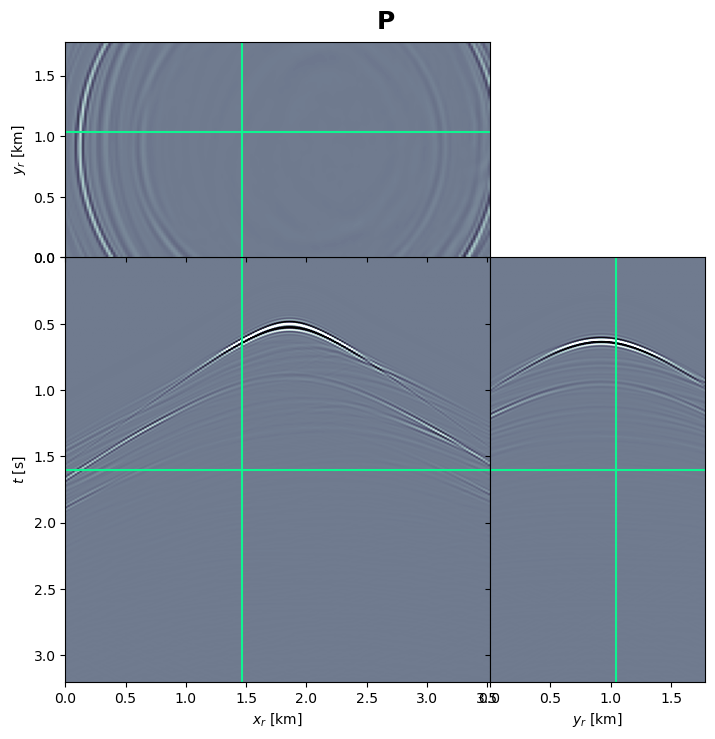

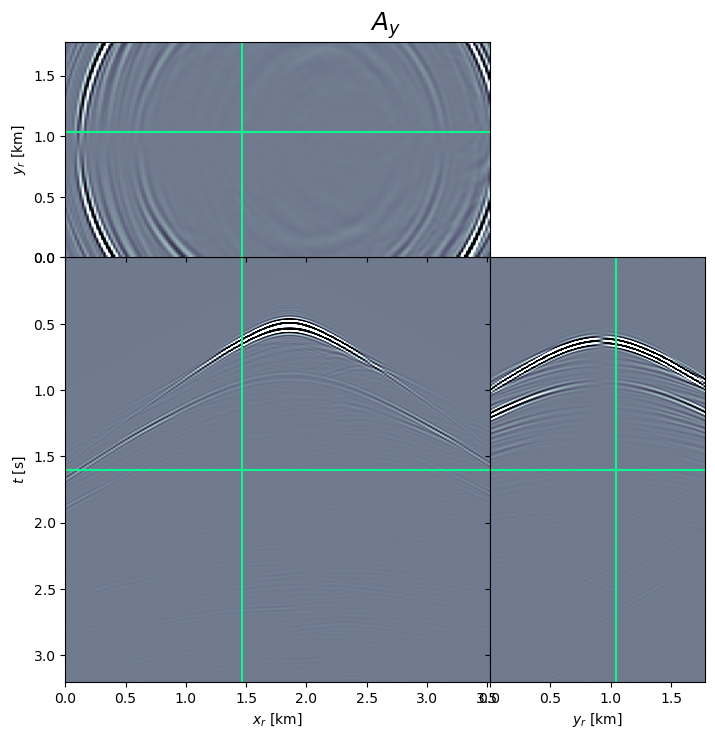

In [3]:
explode_volume(p.transpose(2,1,0), x=73, y=52,
               tlim=[0, t[-1]], tlabel=r'$t$',
               xlim=[x[0]/1e3, x[-1]/1e3], xlabel=r'$x_r$',
               ylim=[y[0]/1e3, y[-1]/1e3], ylabel=r'$y_r$',
               labels= ('[s]', '[km]', '[km]'),
               clipval=(-1e-3, 1e-3), figsize=(8, 8), title='P');

explode_volume(accy.transpose(2,1,0), x=73, y=52,
               tlim=[0, t[-1]], tlabel=r'$t$',
               xlim=[x[0]/1e3, x[-1]/1e3], xlabel=r'$x_r$',
               ylim=[y[0]/1e3, y[-1]/1e3], ylabel=r'$y_r$',
               labels= ('[s]', '[km]', '[km]'),
               clipval=(-1e-5, 1e-5), figsize=(8, 8), title=r'$A_y$');

## Spatial derivatives

We compute now the spatial derivative of $p$ in the freq-wavenumber domain|

In [4]:
nfft_t, nfft_y, nfft_x = 2**10, 2**8, 2**8 # lenght of frequency and wavenumber axis (used to compute gradients and perform FK transforms during data reconstruction)
accy_fk, _, scaccy, _, Fop, D1op, D2op, D, D1, _, kys, kxs, f = \
    gradient_data3d(p, nfft_y, nfft_x, nfft_t, dy, dx, dt)

## Comparison

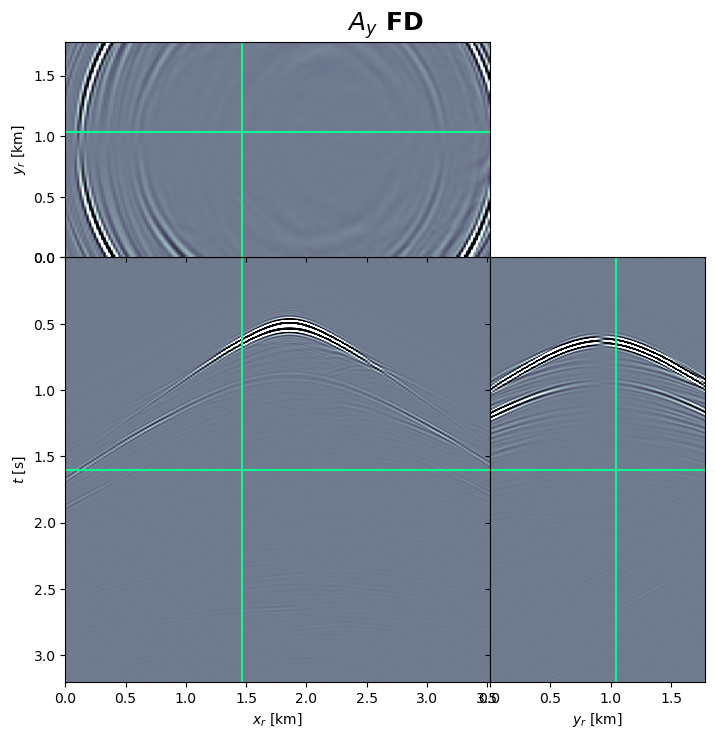

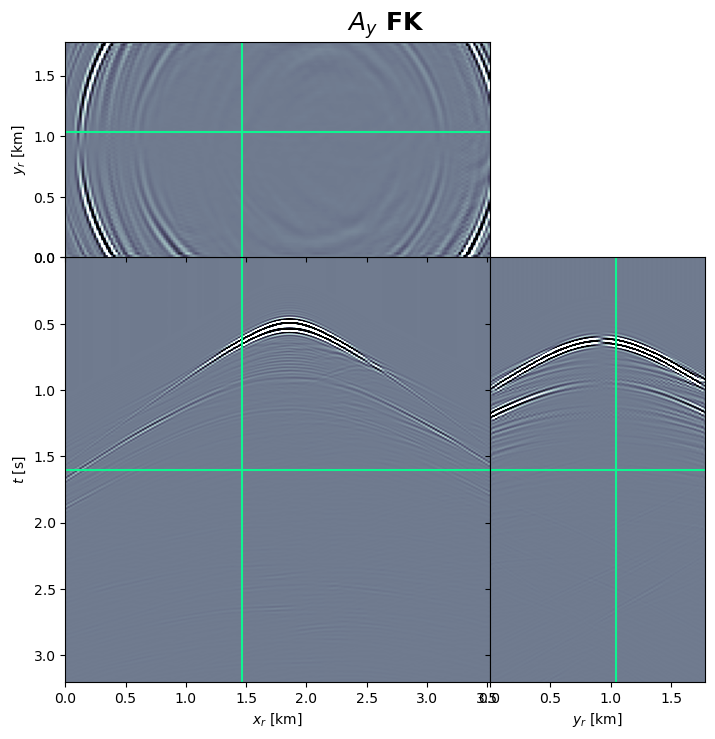

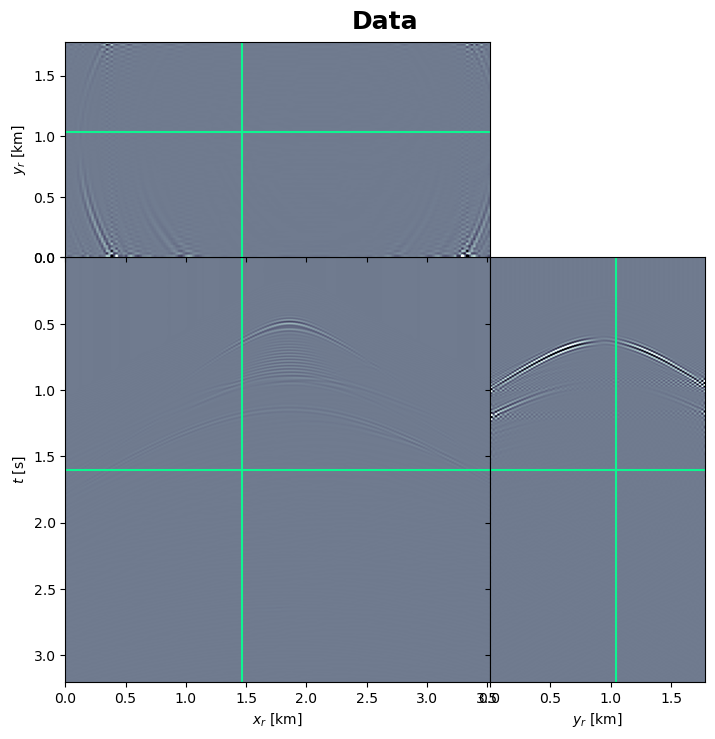

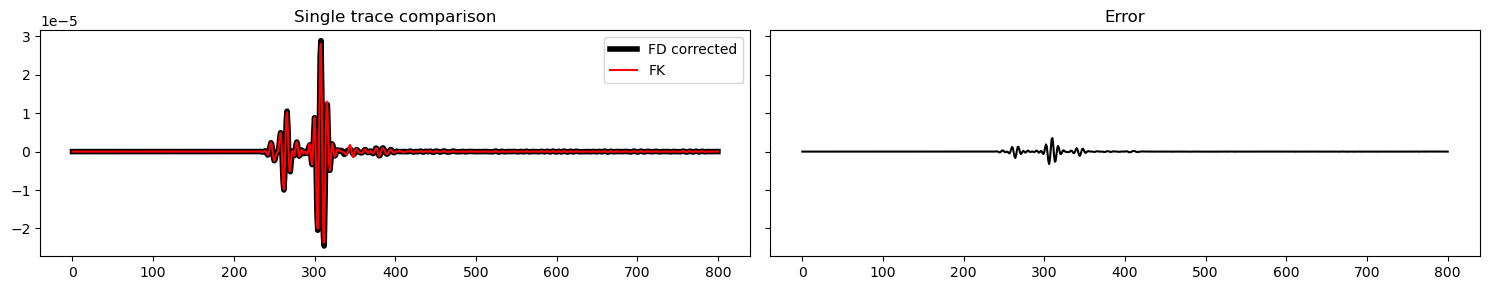

In [5]:
explode_volume(accy.transpose(2,1,0), x=73, y=52,
               tlim=[0, t[-1]], tlabel=r'$t$',
               xlim=[x[0]/1e3, x[-1]/1e3], xlabel=r'$x_r$',
               ylim=[y[0]/1e3, y[-1]/1e3], ylabel=r'$y_r$',
               labels= ('[s]', '[km]', '[km]'),
               clipval=(-1e-5, 1e-5), figsize=(8, 8), title=r'$A_y$ FD')

explode_volume(accy_fk.transpose(2,1,0), x=73, y=52,
               tlim=[0, t[-1]], tlabel=r'$t$',
               xlim=[x[0]/1e3, x[-1]/1e3], xlabel=r'$x_r$',
               ylim=[y[0]/1e3, y[-1]/1e3], ylabel=r'$y_r$',
               labels= ('[s]', '[km]', '[km]'),
               clipval=(-1e-5, 1e-5), figsize=(8, 8), title=r'$A_y$ FK')

explode_volume((accy - accy_fk).transpose(2,1,0), x=73, y=52,
               tlim=[0, t[-1]], tlabel=r'$t$',
               xlim=[x[0]/1e3, x[-1]/1e3], xlabel=r'$x_r$',
               ylim=[y[0]/1e3, y[-1]/1e3], ylabel=r'$y_r$',
               labels= ('[s]', '[km]', '[km]'),
               clipval=(-1e-5, 1e-5), figsize=(8, 8), title='Data');

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 3))
axs[0].plot(accy[ny//4, nx//4], c='k', lw=4, label='FD corrected')
axs[0].plot(accy_fk[ny//4, nx//4], c='r', label='FK')
axs[0].set_title('Single trace comparison')
axs[0].legend()
axs[1].plot(accy[ny//4, nx//4] - accy_fk[ny//4, nx//4], c='k', label='FD corrected')
axs[1].set_title('Error');
fig.tight_layout();